In [1]:
import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch
from matplotlib.colors import to_hex, ListedColormap, Normalize
# import matplotlib.pylab as pl
import numpy as np
import pandas as pd
# from shapely.geometry import Point, Polygon, LineString, MultiLineString
# from shapely.ops import split, linemerge
import geopandas as gpd
# import fiona
# import rasterio
# import rasterio.plot
# from osgeo import gdal, osr, ogr, gdalnumeric
# from mapper import Mapper
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
# import cropping_main
# from preprocessor import create_shape_lists, create_reservoir_file, divide_districts, get_raster_list, get_watershed_list, get_base_order
# from platform import uname

/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#local data folder name
project_folder = 'ca_geo'
projection_string = 'EPSG:4326'#project raster to data projection
projection_num = 4326
point_location_filename = project_folder + '/CALFEWS_RESERVOIRS.csv'#coordinates of map 'points'
shapefile_folder = project_folder + '/CALFEWS_Shapes/'
districts_folder = project_folder + '/CALFEWS_shapes/Water_Districts/'
canal_folder = project_folder + '/CALFEWS_shapes/Canals_and_Aqueducts_local/'
raster_folder = project_folder + '/ca_satellite/'
outline_name = project_folder + '/CALFEWS_shapes/states.shp'#state outline


In [3]:
# urban = gpd.read_file(districts_folder + 'urban_districts.shp')


In [4]:
ag_keys = {
           'BDM': ['berrendamesawaterdistrict'], 'BLR': ['belridgewaterstoragedistrict'], 'BVA': ['buenavistawaterstoragedistrict'], 
           'CWO': ['cawelowaterdistrict'], 'HML': ['henrymillerwaterdistrict'], 'KND': ['kerndeltawaterdistrict'], 'LHL': ['losthillswaterdistrict'],
           'RRB': ['rosedale-riobravowaterstoragedistrict'], 'SMI': ['semitropicwaterservicedistrict'], 'THC': ['tehachapi-cummingscountywaterdistrict'], 
           'TJC': ['tejon-castacwaterdistrict'], 'WKN': ['westkernwaterdistrict'], 'WRM': ['wheelerridge-maricopawaterstoragedistrict'],
           'COB': ['bakersfieldcityof'], 'NKN': ['northkernwaterstoragedistrict'], 'ARV': ['arvin-edisonwaterstoragedistrict'],
           'PIX': ['pixleyirrigationdistrict'], 'DLE': ['delano-earlimartirrigationdistrict'], 'EXE': ['exeterirrigationdistrict'],
           'KRT': ['kern-tulare'], 'LND': ['lindmore'], 'LDS': ['lindsay-strathmoreirrigationdistric'],
           'LWT': ['lowertule'], 'PRT': ['portervilleirrigationdistrict'], 'SAU': ['saucelito'], 'SFW': ['shafter-wascoirrigationdistrict'],
           'SSJ': ['southernsanjoaquinmunicipalutilitydistrict'], 'TPD': ['teapot'], 'TBA': ['terrabellairrigationdistrict'], 'TUL': ['tulareirrigationdistrict'],
           'COF': ['fresnocityof'], 'FRS': ['fresnoirrigation'], 
           'DLR': ['dudleyridge'], 'TLB': ['tularelake'], 'KWD': ['kaweahdelta'], 'WSL': ['westlands'], 'SNL': ['sanluiswater'], 
           'PNC': ['panoche'], 'DLP': ['delpuerto'], 'CWC': ['chowchillawaterdistrict'], 'MAD': ['maderairrigationdistrict'], 
           'CNS': ['consolidated'], 'ALT': ['altairrigationdistrict'],  
           'KWB': ['kernwaterbank'],
         
           'OFK': ['hillsvalley', 'orangecoveirrigationdistrict','lewiscreek','lindsaycityof','stonecorral' ,
                   'ivanhoeirrigationdistrict', 'orangecovecityof', 'tri-valleywaterdistrict', 'internationalwaterdistrict', 
                   'garfield', 'hiddenlakes', 'fresnocountywaterworksdistrictno18'], #'gravely'
           'KRWA': ['kingsriverwaterdistrict'],#, 'kingsriverconservationdistrict'],
           'OEX': ['sanluiscanalcompany', 'centralcalifornia', 'firebaughcanalcompany', 'columbiacanalcompany'],
           'OCD': ['bantacarbonairrigationdistrict, byronbethanyirrigationdistrict', 'eaglefield', 'mercysprings',
                   'oralomawaterdistrict', 'pajarovalleywatermanagementagency', 'pattersonwaterdistrict', 'westsidewaterdistrict',
                   'weststanislaus', 'coelho','fresnoslough', 'jamesirrigationdistrict', 'lagunawaterdistrict',
                   '1606', 'tranquilityirrigationdistrict', 'avenal', 'coalingacityof', 'huroncityof', 'pacheco', 
                   'tranquilitypublicutilitydistrict']#, 'tracycityof'
          }

#                   'OXV': ['hillsvalley', 'tri-valleywaterdistrict']
#,                  'KCWA': 'kerncountywateragency', }
#                   'ID4': '4', 
#                   'OKW': 'otherkaweah',
            #       'OTL': 'othertule', 
#                  'OSW': 'otherswp', 

#                  'SOC': 'socal', 'SOB': 'southbay', 'CCA': 'centralcoast', 
          

In [5]:
def district_match(shp_names, name):
    shp_names_lc = [k.lower().strip().replace(' ','') for k in shp_names]
    is_match = [name in k for k in shp_names_lc]
    return [i for i in range(len(is_match)) if is_match[i]], [shp_names_lc[i] for i in range(len(is_match)) if is_match[i]]

In [6]:
ags = gpd.read_file(districts_folder + 'Water_districts.shp')
ags.sort_values('AGENCYNAME', inplace=True)

In [7]:
district_match(ags.AGENCYNAME, 'kern')

([117,
  322,
  395,
  465,
  1514,
  1575,
  1576,
  1577,
  1578,
  1579,
  1580,
  1957,
  2172,
  2621,
  3000,
  3005,
  3435],
 ['antelopevalley-eastkernwateragency',
  'boyscoutsofamerica-campkern',
  'cacorrectionsdepartmentkernvalleystateprison',
  'californiaamericanwatercompany-kernvillesystem',
  'inyokerncommunityservicesdistrict',
  'kern-tularewaterdistrict',
  'kerncountywateragency',
  'kerndeltawaterdistrict',
  'kernnationalwildliferefuge',
  'kernrivervalleycommunityservicedistrict',
  'kernwaterbank',
  'meadowsofthekernmutualwatercompany',
  'northkernwaterstoragedistrict',
  'riverkernmutualwatercompany',
  'southforkelementaryschoolinkerncounty',
  'southkernmutualwatercompany',
  'westkernwaterdistrict'])

<AxesSubplot:>

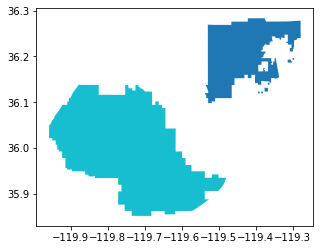

In [8]:
ags.iloc[3226:3228].plot('AGENCYNAME')


In [9]:
idxs = []
names = []
for k,vs in ag_keys.items():
    for v in vs:
        idx, name = district_match(ags.AGENCYNAME, v)
        idxs += idx
        name += name
ags = ags.iloc[idxs,:]
ags.reset_index(drop=True, inplace=True)

In [10]:
district_match(ags.AGENCYNAME, 'tulare')

([20, 30, 34],
 ['kern-tularewaterdistrict',
  'tulareirrigationdistrict',
  'tularelakebasinwaterstoragedistrict'])

In [11]:
ags['key'] = ''
for k,vs in ag_keys.items():
    for v in vs:
        idxs, names = district_match(ags.AGENCYNAME, v)
        for idx, name in zip(idxs, names):
            for k, ls in ag_keys.items():
                for l in ls:
                    if l in name:
                        key = k
            ags['key'].iloc[idx] = key
ags

/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,OBJECTID,AGENCYNAME,SOURCE,AGENCYUNIQ,LASTMODIFI,MODIFIEDBY,SOURCECOMM,Date_Data_,GlobalID,geometry,key
0,88,Berrenda Mesa Water District,SCRO,181.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{C4109EEC-8A3D-4DD4-8621-BC3E05F09AFB},"MULTIPOLYGON (((-119.93916 35.73105, -119.9210...",BDM
1,87,Belridge Water Storage District,SCRO,176.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{184ED363-BC91-48AC-BC08-27053E442B2B},"MULTIPOLYGON (((-119.64265 35.41219, -119.6426...",BLR
2,91,Buena Vista Water Storage District,SCRO,284.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{8FCD432C-196F-47C1-AE1C-5163B2721E87},"MULTIPOLYGON (((-119.59507 35.60159, -119.5946...",BVA
3,93,Cawelo Water District,SCRO,500.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{2FD493E5-09D5-4DEB-925D-BB79BC07B16B},"MULTIPOLYGON (((-119.12481 35.68571, -119.1247...",CWO
4,107,Henry Miller Water District,SCRO,1160.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{096D1042-FD32-4EE4-8862-C02B81698155},"POLYGON ((-119.29930 35.23489, -119.29883 35.2...",HML
...,...,...,...,...,...,...,...,...,...,...,...
75,43955,Avenal City Of,SERYSIAN,114.0,2017-04-04T10:38:16.000Z,SERYSIAN,ICE City Limits layer,2017-04-04T10:37:45.000Z,{A19642EA-C848-47BE-998F-3A7C0D0963A1},"POLYGON ((-120.05838 36.09466, -120.05824 36.0...",OCD
76,43963,Coalinga City Of,SERYSIAN,578.0,2017-04-04T11:24:01.000Z,SERYSIAN,Caltrans urban area boundaries in California d...,2017-04-04T11:23:33.000Z,{AFC46D70-1357-4418-9ABC-A93672E6F976},"POLYGON ((-120.35368 36.18022, -120.35381 36.1...",OCD
77,43960,Huron City Of,SERYSIAN,1218.0,2017-04-04T11:19:59.000Z,SERYSIAN,California Environmental Health Tracking Program,2017-04-04T11:19:24.000Z,{84F43B52-6296-48D1-81F8-23ED37975412},"MULTIPOLYGON (((-120.10192 36.21439, -120.1019...",OCD
78,22,Pacheco Water District,SCRO,1829.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{D5293D25-9B58-48CD-97CE-FFC6085A598A},"POLYGON ((-120.77963 36.92515, -120.77962 36.9...",OCD


In [12]:
ags['area'] = ags.geometry.area

/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [13]:
is_partner = {}
is_partner['friantHistorical'] = {'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False, 
                         'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False, 
                         'NKN':False, 'ARV':True, 'PIX':False, 'DLE':True, 'EXE':True, 'OKW':False, 'KRT':False, 'LND':True, 
                         'LDS':True, 'LWT':True, 'PRT':True, 'SAU':True, 'SFW':True, 'SSJ':True, 'TPD':True, 'TBA':True, 
                         'TUL':True, 'COF':True, 'FRS':True, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                         'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                         'OFK':True, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

# 1827: ['HML', 'WRM', 'PIX', 'LDS', 'TUL', 'SOB']
is_partner['1827'] = {      'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':True, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':True, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':False, 'PIX':True, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':False, 'LND':False, 
                 'LDS':True, 'LWT':False, 'PRT':False, 'SAU':False, 'SFW':False, 'SSJ':False, 'TPD':False, 'TBA':False, 
                 'TUL':True, 'COF':False, 'FRS':False, 'SOC':False, 'SOB':True, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':False, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

# 2454: ['ARV', 'KRT', 'LND', 'TUL', 'OFK']
is_partner['2454'] = {'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':True, 'PIX':False, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':True, 'LND':True, 
                 'LDS':False, 'LWT':False, 'PRT':False, 'SAU':False, 'SFW':False, 'SSJ':False, 'TPD':False, 'TBA':False, 
                 'TUL':True, 'COF':False, 'FRS':False, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':True, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

# 537: ['BDM', 'WRM', 'ARV', 'LND', 'SAU', 'TPD', 'TBA', 'COF']
is_partner['537'] = {'BDM':True, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':True, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':True, 'PIX':False, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':False, 'LND':True, 
                 'LDS':False, 'LWT':False, 'PRT':False, 'SAU':True, 'SFW':False, 'SSJ':False, 'TPD':True, 'TBA':True, 
                 'TUL':False, 'COF':True, 'FRS':False, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':False, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

# 981: ['HML', 'PIX', 'KRT', 'LDS', 'LWT', 'SAU', 'KWD', 'OXV']
is_partner['981'] = {'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':True, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':False, 'PIX':True, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':True, 'LND':False, 
                 'LDS':True, 'LWT':True, 'PRT':False, 'SAU':True, 'SFW':False, 'SSJ':False, 'TPD':False, 'TBA':False, 
                 'TUL':False, 'COF':False, 'FRS':False, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':True, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':False, 'OCD':False, 'OEX':False, 'OXV':True, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

is_partner['boxplot'] = {'BDM':False, 'BLR':False, 'BVA':True, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':False, 'PIX':False, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':False, 'LND':False, 
                 'LDS':False, 'LWT':False, 'PRT':False, 'SAU':False, 'SFW':False, 'SSJ':False, 'TPD':False, 'TBA':False, 
                 'TUL':True, 'COF':True, 'FRS':False, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':False, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}

is_partner['test'] = {'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False, 
                 'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False, 
                 'NKN':False, 'ARV':False, 'PIX':False, 'DLE':False, 'EXE':False, 'OKW':False, 'KRT':False, 'LND':False, 
                 'LDS':False, 'LWT':False, 'PRT':False, 'SAU':False, 'SFW':False, 'SSJ':False, 'TPD':False, 'TBA':False, 
                 'TUL':True, 'COF':False, 'FRS':False, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False, 
                 'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False, 
                 'OFK':False, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}


In [14]:
### read in district level results, get color for map
datasets = ['friantHistorical_median_FKC', '537_median_FKC_CFWB', 'boxplot_combined']
labels = [s.split('_')[0] for s in datasets]

for l in labels:
    ags['is_' + l] = [is_partner[l][d] for d in ags.key]

(34.75, 37.75)

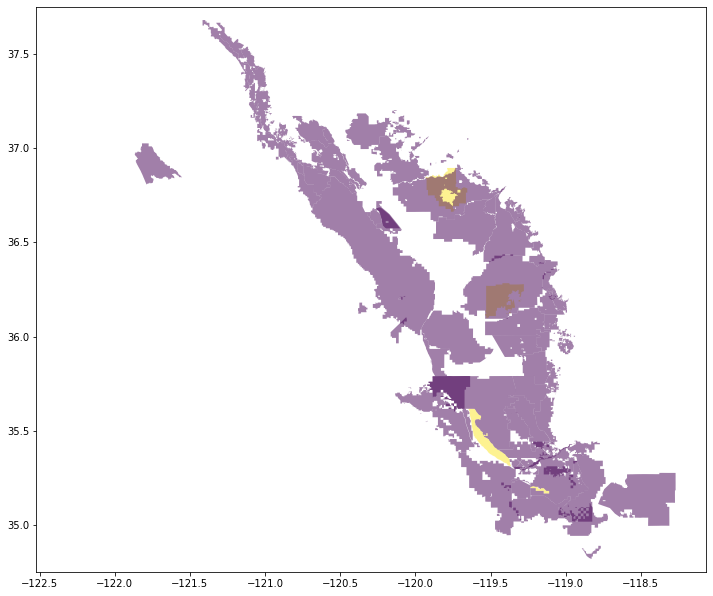

In [15]:
ags.plot('is_boxplot', figsize=(12,12), alpha=0.5)
plt.ylim([34.75, 37.75])

In [16]:
cdict = {}
anon_dict = {}
for dataset in datasets[:-1]:
    ds = pd.read_csv('../../figures/results_' + dataset + '.csv')
    label = dataset.split('_')[0]

    # convert str to tuple
    def str_to_tuple(strtup):
        strs = strtup.split('(')[1]
        strs = strs.split(')')[0]
        strs = strs.split(', ')
        tup = [float(s) for s in strs]
        return tup

    ds.color.loc[ds.color == 0.5] = '(0.5, 0.5, 0.5, 1.0)'
    cdict[label] = {ds.district.iloc[i]: str_to_tuple(ds.color.iloc[i]) for i in range(ds.shape[0])}
    cdict[label]['KWB'] = [0.5,0.5,0.5,0.5]

    anon_dict[label] = {ds.district.iloc[i]: ds.district_label.iloc[i] for i in range(ds.shape[0])}
    anon_dict[label]['KWB'] = ''

    ags['color_' + label] = [to_hex(cdict[label][d]) for d in ags.key]
    ags['anon_' + label] = [anon_dict[label][d] for d in ags.key]

/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
### treat boxplot separately, since different csv structure
for dataset in datasets[-1:]:
    ds = pd.read_csv('../../figures/results_' + dataset + '.csv')
    label = dataset.split('_')[0]

#     # convert str to tuple
#     def str_to_tuple(strtup):
#         strs = strtup.split('(')[1]
#         strs = strs.split(')')[0]
#         strs = strs.split(', ')
#         tup = [float(s) for s in strs]
#         return tup

#     ds.color.loc[ds.color == 0.5] = '(0.5, 0.5, 0.5, 1.0)'
    cdict[label] = {ds.district.iloc[i]: ds.color.iloc[i] for i in range(ds.shape[0])}
    cdict[label]['KWB'] = '#c1c1c1'

    anon_dict[label] = {ds.district.iloc[i]: ds.district_label.iloc[i] for i in range(ds.shape[0])}
    anon_dict[label]['KWB'] = ''

    ags['color_' + label] = [cdict[label][d] if d in cdict[label] else '#c1c1c1' for d in ags.key ]
    ags['anon_' + label] = [anon_dict[label][d] if d in anon_dict[label] else 'other' for d in ags.key ]
    
# ags.loc[ags['anon_boxplot'] == 'other',]

['friantHistorical', '537', 'boxplot']


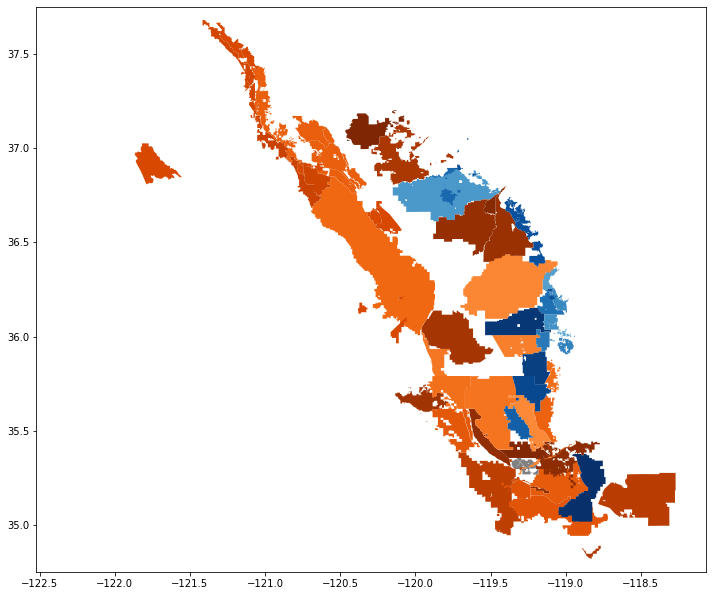

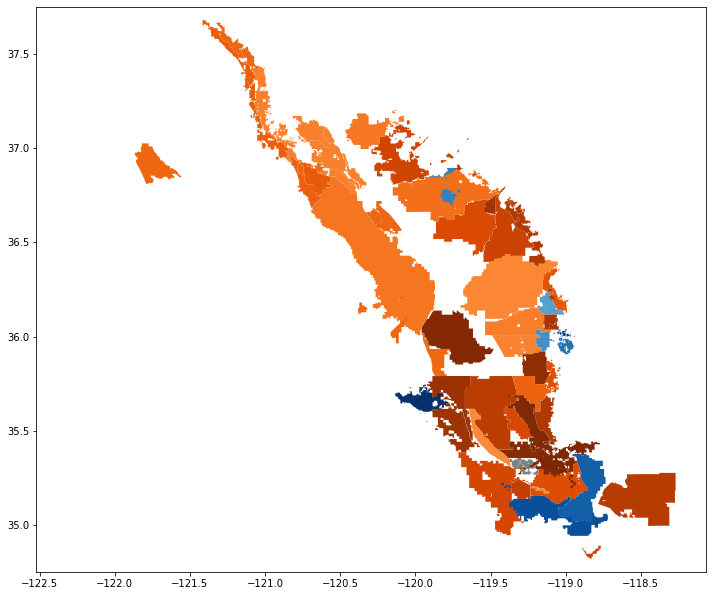

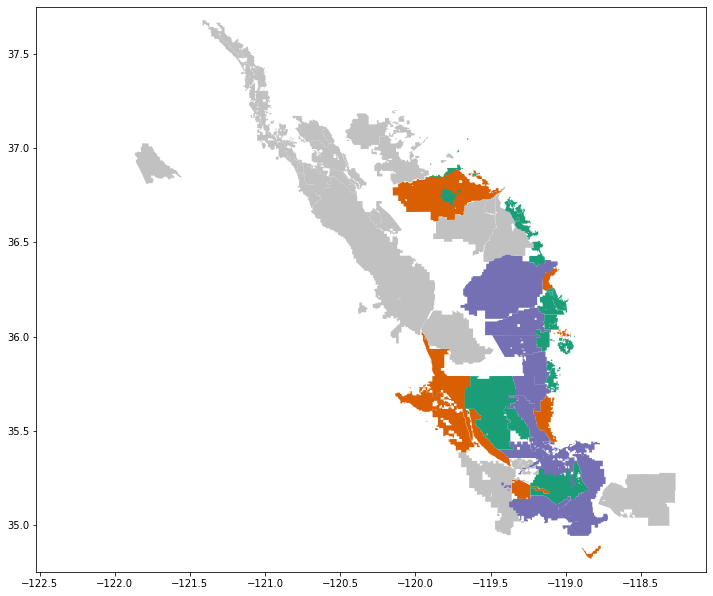

In [18]:
print(labels)
for l in labels:
    ags.plot(color=ags['color_' + l], figsize=(12,12), label=ags['anon_' + l])
    plt.ylim([34.75, 37.75])

In [19]:
labels

['friantHistorical', '537', 'boxplot']

In [42]:
### write new polygons
for l in labels[:-1]:
    ags.loc[ags['is_' + l], :].to_file(shapefile_folder + 'districts_FKC_experiment_' + l + '_partners.shp')
    ags.loc[np.logical_not(ags['is_' + l]), :].to_file(shapefile_folder + 'districts_FKC_experiment_' + l + '_nonpartners.shp')
### for boxplot_combined, need 3 categories: topfriant, topnonfriant, bottomfriant, bottomnonfriant. friant will have black outline, top/bottom is for zorder clarity.
for l in labels[-1:]:
    ags.loc[np.logical_and(ags['is_friantHistorical'], ags['is_boxplot']), :].to_file(shapefile_folder + 'districts_FKC_experiment_topfriant.shp')
    ags.loc[np.logical_and(np.logical_not(ags['is_friantHistorical']), ags['is_boxplot']), :].to_file(shapefile_folder + 'districts_FKC_experiment_topnonfriant.shp')
    ags.loc[np.logical_and(ags['is_friantHistorical'], np.logical_not(ags['is_boxplot'])), :].to_file(shapefile_folder + 'districts_FKC_experiment_bottomfriant.shp')
    ags.loc[np.logical_and(np.logical_not(ags['is_friantHistorical']), np.logical_not(ags['is_boxplot'])), :].to_file(shapefile_folder + 'districts_FKC_experiment_bottomnonfriant.shp')
### for sagbi, just want base shapes all at once
ags.to_file(shapefile_folder + 'districts_FKC_experiment_sagbi.shp')


/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  after removing the cwd from sys.path.
/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  import sys
/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: 

### check out SAGBI data

In [27]:
# ### read in SAGBI data, transform to coord system of districts, and clip to districts. save clipped version.
# sagbi = gpd.read_file('../../../../Downloads/SAGBI-20210914T194833Z-001/SAGBI/sagbi_mod/sagbi_mod.shp')
# sagbi = sagbi.to_crs(ags.crs)
# print(sagbi.crs, sagbi.crs == ags.crs)
# sagbi_clip = gpd.clip(sagbi, ags)
# sagbi_clip.to_file('../../../../Downloads/SAGBI-20210914T194833Z-001/SAGBI/sagbi_mod/sagbi_mod_clip.shp')


In [28]:
### read in clipped data
sagbi = gpd.read_file('../../../../Downloads/SAGBI-20210914T194833Z-001/SAGBI/sagbi_mod/sagbi_mod_clip.shp')

In [49]:
set(sagbi.rat_grp)
cdict_sagbi = {'Excellent': 'darkgreen',
 'Good': 'limegreen',
 'Moderately Good': 'yellow',
 'Moderately Poor': 'orange',
 None: '0.5',
 'Poor': 'red',
 'Very Poor': 'darkred'}

sagbi['color_sagbi'] = [cdict_sagbi[rating] for rating in sagbi['rat_grp']]
sagbi['color_sagbi']
sagbi.to_file('../../../../Downloads/SAGBI-20210914T194833Z-001/SAGBI/sagbi_mod/sagbi_mod_clip.shp')


/mnt/c/Users/Andrew/Documents/WSL_transfers/ca_maps/ca_maps_for_andrew/.venv_spatial/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  if sys.path[0] == '':


<AxesSubplot:>

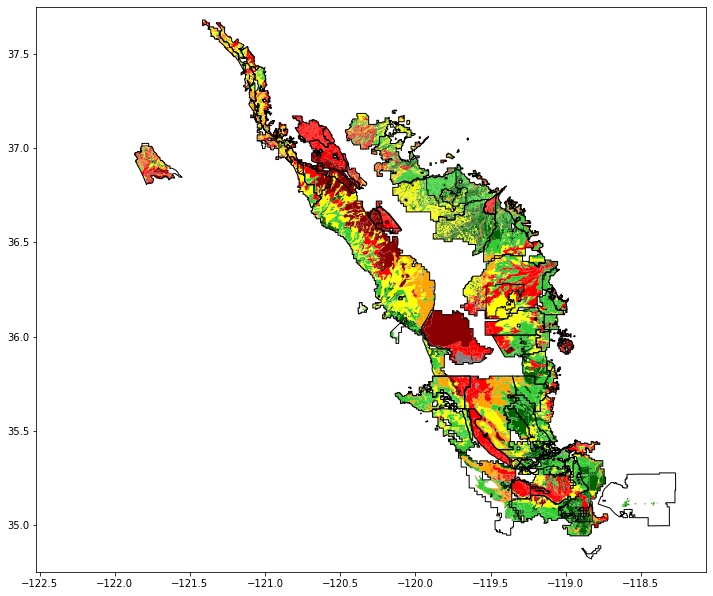

In [50]:
ax = sagbi.plot(color=sagbi['color_sagbi'], figsize=(12,12))
ax.set_ylim([34.75, 37.75])
ags.plot(color='none', edgecolor='k', ax=ax)